In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Bank_Churn/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Bank_Churn/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/dataset/Bank_Churn/sample_submission.csv')

In [ ]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  float64
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  float64
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  float64
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 17.6+ MB


In [ ]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


# Overview of training data

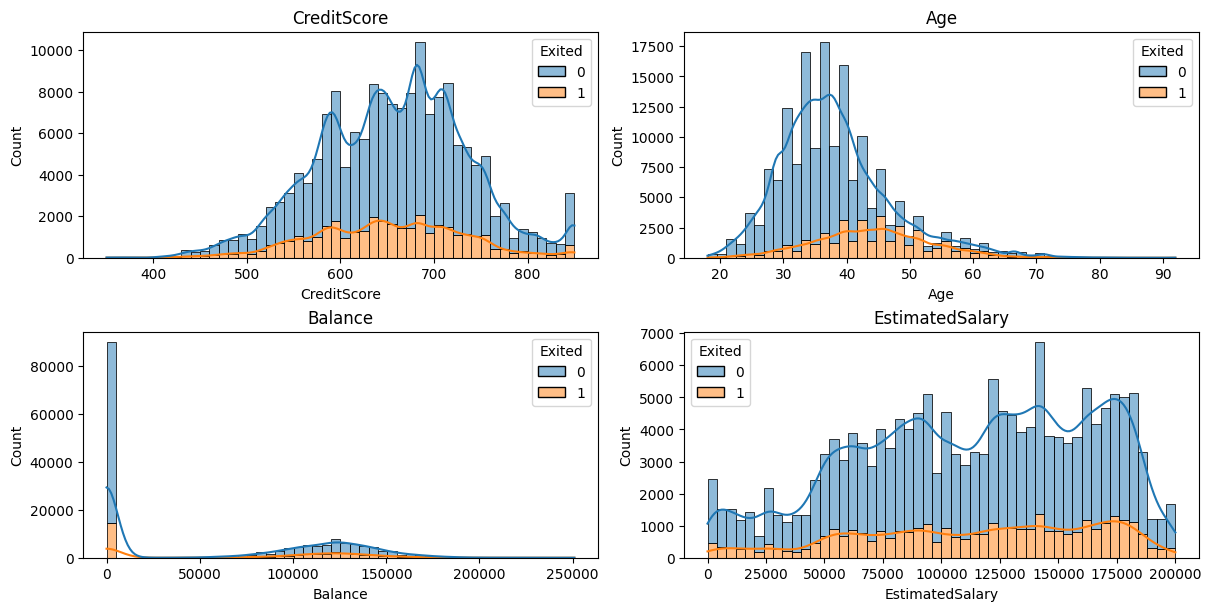

In [ ]:
# Observe the distribution of numerical value
fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(12, 6))
axesSub = sns.histplot(data=train, x="CreditScore", hue="Exited", multiple='stack', kde=True, bins=50, ax=ax[0,0])
axesSub.set_title('CreditScore')
axesSub = sns.histplot(data=train, x="Age", hue="Exited", multiple='stack', kde=True, bins=50, ax=ax[0,1])
axesSub.set_title('Age')

axesSub = sns.histplot(data=train, x="Balance", hue="Exited", multiple='stack', kde=True, bins=50, ax=ax[1,0])
axesSub.set_title('Balance')
axesSub = sns.histplot(data=train, x="EstimatedSalary", hue="Exited", multiple='stack', kde=True, bins=50, ax=ax[1,1])
axesSub = axesSub.set_title('EstimatedSalary')

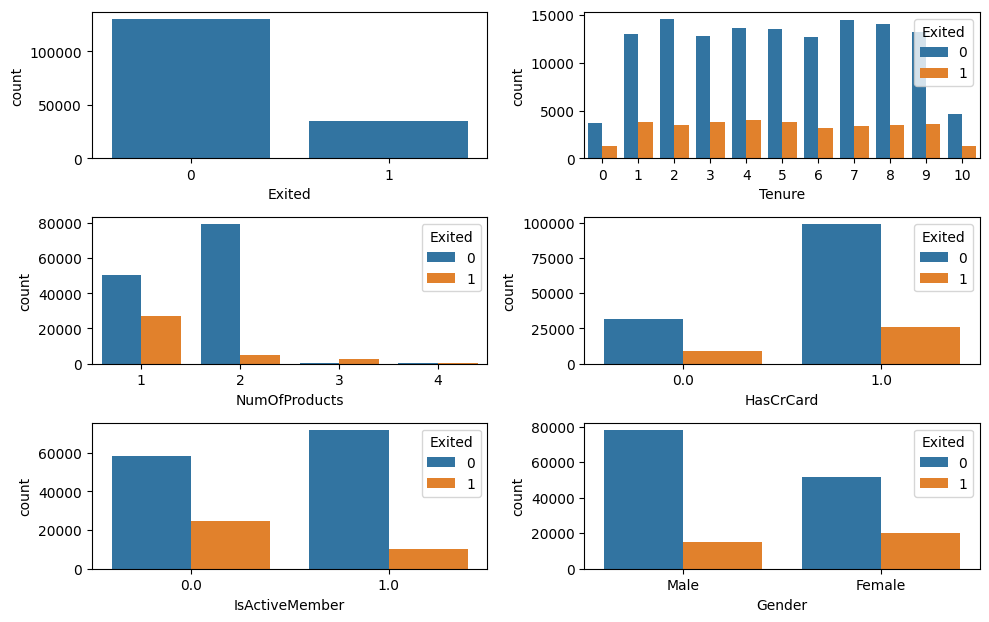

In [ ]:
# Observe the distribution of caterical value
plt.figure(figsize=(10,10))
plt.subplot(521)
sns.countplot(train, x='Exited')
plt.subplot(522)
sns.countplot(train, x='Tenure', hue='Exited')
plt.subplot(523)
sns.countplot(train, x='NumOfProducts', hue='Exited')
plt.subplot(524)
sns.countplot(train, x='HasCrCard', hue='Exited')
plt.subplot(525)
sns.countplot(train, x='IsActiveMember', hue='Exited')
plt.subplot(526)
sns.countplot(train, x='Gender', hue='Exited')
plt.tight_layout()
plt.show()

<ipython-input-51-5f70843092ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
<ipython-input-51-5f70843092ba>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
<ipython-input-51-5f70843092ba>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_on

Text(0.5, 1.0, 'Correlation Heatmap of training set')

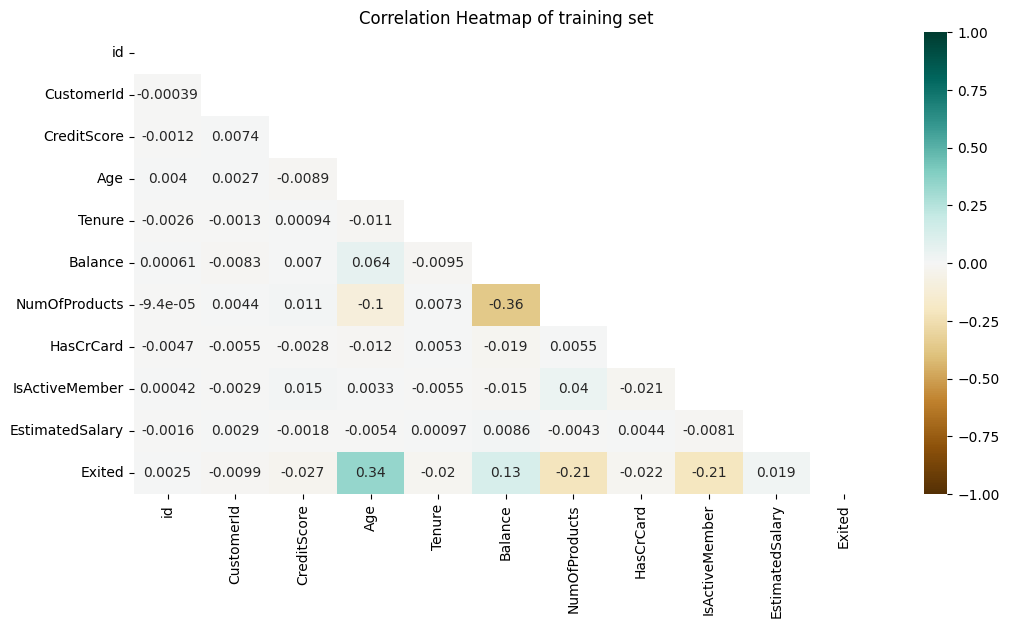

In [ ]:
# Correlation between features
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
cor = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG')
cor.set_title('Correlation Heatmap of training set')

# Data preprocessing

In [3]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
def scale(data):
  numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

  scaler = MinMaxScaler()
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

  return data

In [4]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
  le = LabelEncoder()
  cols_to_encode = ['Geography', 'Gender']

  for col in cols_to_encode:
    data[col] = le.fit_transform(data[col])

  return data

In [5]:
# Adds a binary column indicating whether a person is a senior (age 50 or above).
def age_group(data):
  data['Senior'] = data['Age'].apply(lambda x:1 if x>=50 else 0)
  return data

In [6]:
train = age_group(train)
print(train.head())

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  Senior  
0       0       0  
1       0       0  
2 

In [7]:
train = scale(train)
train = label_encoder(train)
print(train.head())

   id  CustomerId         Surname  CreditScore  Geography  Gender       Age  \
0   0    15674932  Okwudilichukwu        0.636          0       1  0.202703   
1   1    15749177   Okwudiliolisa        0.554          0       1  0.202703   
2   2    15694510           Hsueh        0.656          0       1  0.297297   
3   3    15741417             Kao        0.462          0       1  0.216216   
4   4    15766172       Chiemenam        0.732          2       1  0.202703   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.3  0.000000       0.333333        1.0             0.0   
1     0.1  0.000000       0.333333        1.0             1.0   
2     1.0  0.000000       0.333333        1.0             0.0   
3     0.2  0.593398       0.000000        1.0             1.0   
4     0.5  0.000000       0.333333        1.0             1.0   

   EstimatedSalary  Exited  Senior  
0         0.907279       0       0  
1         0.247483       0       0  
2         0.924364     

In [8]:
# Split training and testing set
from sklearn.model_selection import train_test_split
X = train.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Data resample
from imblearn.over_sampling import SMOTE
smote_samp = SMOTE(sampling_strategy='minority',random_state=42)

In [10]:
columns = X_train.columns

X_train_resampled, y_train_resampled = smote_samp.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Senior
0,0.284,0,1,0.189189,1.0,0.000000,0.333333,1.0,1.0,0.247283,0
1,0.692,0,0,0.189189,0.0,0.000000,0.000000,1.0,1.0,0.377872,0
2,0.604,2,1,0.337838,1.0,0.493499,0.333333,1.0,1.0,0.464539,0
3,0.602,0,1,0.310811,0.4,0.000000,0.000000,1.0,1.0,0.663998,0
4,0.788,0,0,0.283784,0.7,0.000000,0.000000,1.0,0.0,0.658823,0


# Model building - XGBoost

In [ ]:
# Grid Search
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
n_estimators = range(100,1000,100)
max_depth = [4,5,6,7,8,9]
learning_rate =[round(float(x),2) for x in np.linspace(start=0.01, stop=0.2, num=10)]
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate}
GSCV = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)
GSCV.fit(X_train_resampled, y_train_resampled)

print('The best model param:', GSCV.best_params_)

The best model param: {'learning_rate': 0.12, 'max_depth': 9, 'n_estimators': 900}


In [11]:
# Conduct the model
import xgboost as xgb
import numpy as np
from sklearn import metrics
xgb_model = xgb.XGBClassifier(n_estimators=900, max_depth=9, learning_rate=0.12, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('AUC:', metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8512739721877177
AUC: 0.7578749245607571


# ROC curve

In [12]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

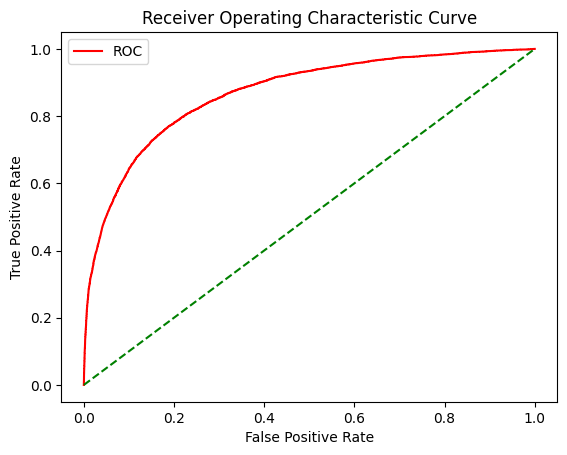

In [14]:
probs = xgb_model.predict_proba(X_test)
prob = probs[:, 1]
fper, tper, thresholds = metrics.roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

# Test dataset prepocessing

In [ ]:
train = age_group(test)
test = scale(test)
test = label_encoder(test)
print(test.head())

       id  CustomerId    Surname  CreditScore  Geography  Gender       Age  \
0  165034    15773898   Lucchese        0.472          0       0  0.067568   
1  165035    15782418       Nott        0.666          0       0  0.378378   
2  165036    15807120         K?        0.612          0       0  0.216216   
3  165037    15808905  O'Donnell        0.662          0       1  0.243243   
4  165038    15607314    Higgins        0.804          1       1  0.270270   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.2  0.000000       0.333333        0.0             1.0   
1     0.2  0.000000       0.000000        1.0             0.0   
2     0.7  0.000000       0.333333        1.0             0.0   
3     0.8  0.000000       0.000000        1.0             0.0   
4     1.0  0.483318       0.000000        1.0             0.0   

   EstimatedSalary  Senior  
0         0.804903       0  
1         0.362723       0  
2         0.694419       0  
3         0.569654      

In [ ]:
X = test.drop(['id', 'CustomerId', 'Surname'], axis=1)
y_pred = xgb_model.predict(X)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
y_prob = xgb_model.predict_proba(X)

In [ ]:
submission['Exited'] = 1-y_prob
print(submission.head())

       id    Exited
0  165034  0.025052
1  165035  0.697912
2  165036  0.012179
3  165037  0.218468
4  165038  0.643107


In [ ]:
submission.shape

(110023, 2)

In [ ]:
# Save to csv
submission.to_excel('path', index=False, encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
